In [68]:
#O. Kürşat Karayılan
#150140011
#########################
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import math
import random
#import any other non-machine learning modules that you wish
#SHORTCUTS: Alt + Enter includes new cell below, CTRL + Enter executes the current cell
##########################
df1 = pd.read_csv("train1.csv") 
df2 = pd.read_csv("train2.csv") 
df2m = pd.read_csv("train2_modified.csv") #will be used in Part D

In [271]:
#Cov. matrix of dataset 1
df1_class0 = df1[df1['y']==0]
df1_class1 = df1[df1['y']==1]
cov_mtrx1_0 = df1_class0.cov()
cov_mtrx1_1 = df1_class1.cov()
cov_mtrx1_0 = cov_mtrx1_0[["x1", "x2"]]
cov_mtrx1_0 = cov_mtrx1_0.loc[["x1", "x2"]]
cov_mtrx1_1 = cov_mtrx1_1[["x1", "x2"]]
cov_mtrx1_1 = cov_mtrx1_1.loc[["x1", "x2"]]

In [239]:
#Cov. matrix of dataset 2
df2_class0 = df2[df2['y']==0]
df2_class1 = df2[df2['y']==1]
cov_mtrx2_0 = df2_class0.cov()
cov_mtrx2_1 = df2_class1.cov()
cov_mtrx2_0 = cov_mtrx2_0[["x1", "x2"]]
cov_mtrx2_0 = cov_mtrx2_0.loc[["x1", "x2"]]
cov_mtrx2_1 = cov_mtrx2_1[["x1", "x2"]]
cov_mtrx2_1 = cov_mtrx2_1.loc[["x1", "x2"]]

[Text(0, 0, ''), Text(0, 0, 'x1'), Text(0, 0, 'x2')]

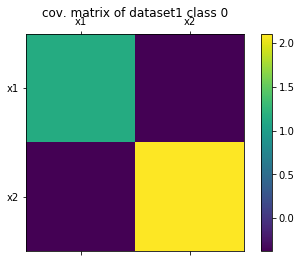

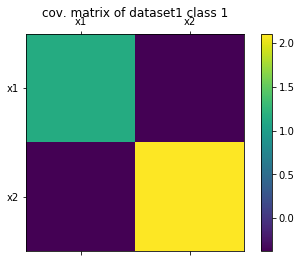

In [240]:
#PART A: Examine training sets here. plots etc.
#Hint: df1_class0 = df1[df1['column_name']==0] creates a new dataframe and includes samples (rows) whose class values are 0
#hint: for data distribution plots use plt.scatter(x-axis,y-axis,other params. check online)
#Hint: for each new plot use plt.figure() so they won't overlap one to another
#-------
#to plot cov. matrices you may use: (find 'cov_mtrx' with yourself)
alpha = ['x1', 'x2']
fig = plt.figure()
fig2 = plt.figure()
ax = fig.add_subplot(111)
ax.set_title("cov. matrix of dataset1 class 0")
ax2 = fig2.add_subplot(111)
ax2.set_title("cov. matrix of dataset1 class 1")
cax = ax.matshow(cov_mtrx1_0,interpolation='nearest') #cov. matrix of dataset1 class 0
cax2 = ax2.matshow(cov_mtrx1_1,interpolation='nearest') #cov. matrix of dataset1 class 0
fig.colorbar(cax)
fig2.colorbar(cax2)
ax.set_xticklabels(['']+alpha)
ax.set_yticklabels(['']+alpha)
ax2.set_xticklabels(['']+alpha)
ax2.set_yticklabels(['']+alpha)
#---------
#for the histogram plots use plt.hist() (Remember: 4 of them we want)
#for title use: plt.gca().set(title='Data distribution of feature x of trainingSet y', ylabel='Frequency')

In [241]:
# They are same.
# x2 more spreaded out since its variance is higher.
# There are negative corelation between x1 and x2 in both cases.


[Text(0, 0, ''), Text(0, 0, 'x1'), Text(0, 0, 'x2')]

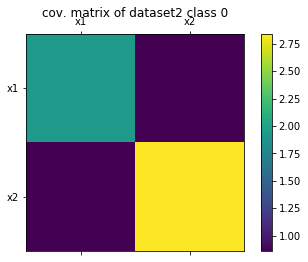

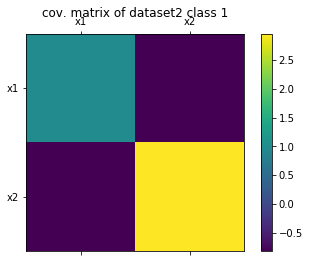

In [242]:
alpha = ['x1', 'x2']
fig = plt.figure()
fig2 = plt.figure()
ax = fig.add_subplot(111)
ax.set_title("cov. matrix of dataset2 class 0")
ax2 = fig2.add_subplot(111)
ax2.set_title("cov. matrix of dataset2 class 1")
cax = ax.matshow(cov_mtrx2_0,interpolation='nearest') 
cax2 = ax2.matshow(cov_mtrx2_1,interpolation='nearest')
fig.colorbar(cax)
fig2.colorbar(cax2)
ax.set_xticklabels(['']+alpha)
ax.set_yticklabels(['']+alpha)
ax2.set_xticklabels(['']+alpha)
ax2.set_yticklabels(['']+alpha)

In [243]:
# x2 is again more spreaded both cases. x1 more spreaded in class 0. 
# In class 0 there is positive corelation but in class1 there is negative corelation.

[Text(0, 0.5, 'Frequency'),
 Text(0.5, 1.0, 'Data dist. of feature x1 of trainingset1')]

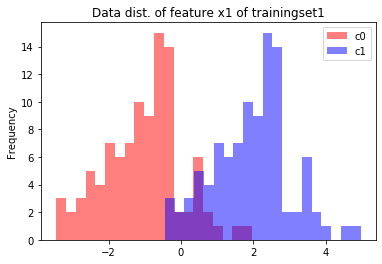

In [244]:
plt.hist(df1_class0["x1"], bins=20, label="c0", alpha=0.5, color="r")
plt.hist(df1_class1["x1"], bins=20, label="c1", alpha=0.5, color="b")
plt.legend(loc="best")
plt.gca().set(title='Data dist. of feature x1 of trainingset1', ylabel='Frequency')

In [245]:
#class 0 ones settled below 0 and class 1 ones settled between 0 and 4. Those are x1 values.
#Very little overlap. Their mean are far away from each one. So easy to seperate. 

[Text(0, 0.5, 'Frequency'),
 Text(0.5, 1.0, 'Data dist. of feature x2 of trainingset1')]

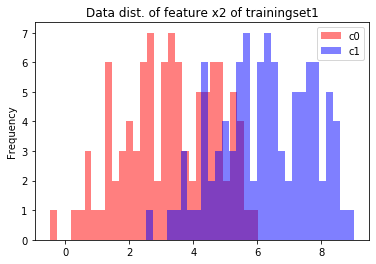

In [246]:
plt.hist(df1_class0["x2"], bins=30, label="c0", alpha=0.5, color="r")
plt.hist(df1_class1["x2"], bins=30, label="c1", alpha=0.5, color="b")
plt.legend(loc="best")
plt.gca().set(title='Data dist. of feature x2 of trainingset1', ylabel='Frequency')

In [247]:
#class 0 ones settled between 0 and 6.  class 1 ones settled between 4 and 8. 
#There are some overlap between 4 and 6. Those are x2 values. There are multiple peak values. 

[Text(0, 0.5, 'Frequency'),
 Text(0.5, 1.0, 'Data dist. of feature x1 of trainingset2')]

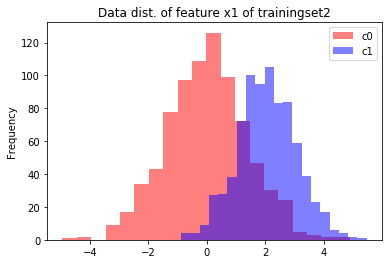

In [248]:
plt.hist(df2_class0["x1"], bins=20, label="c0", alpha=0.5, color="r")
plt.hist(df2_class1["x1"], bins=20, label="c1", alpha=0.5, color="b")
plt.legend(loc="best")
plt.gca().set(title='Data dist. of feature x1 of trainingset2', ylabel='Frequency')

In [249]:
#There are 120 values of x1 around 0 for class 0. Also class 1 clustered around 2. 

[Text(0, 0.5, 'Frequency'), Text(0.5, 1.0, 'Data dist. of x2 trainingset2')]

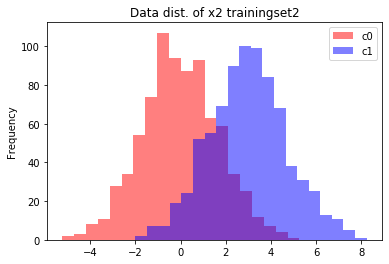

In [250]:
plt.hist(df2_class0["x2"], bins=20, label="c0", alpha=0.5, color="r")
plt.hist(df2_class1["x2"], bins=20, label="c1", alpha=0.5, color="b")
plt.legend(loc="best")
plt.gca().set(title='Data dist. of x2 trainingset2', ylabel='Frequency')

In [251]:
#Class 0 clustered between -2 and 0. Class 1 clustered between 2 and 4. 

[Text(0.5, 1.0, 'Dataset1')]

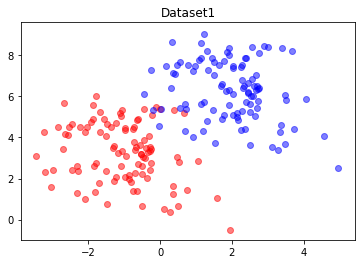

In [252]:
plt.scatter(df1_class0["x1"], df1_class0["x2"], c="r", alpha=0.5)
plt.scatter(df1_class1["x1"], df1_class1["x2"], c="b", alpha=0.5)
plt.gca().set(title='Dataset1')


[Text(0.5, 1.0, 'Dataset2')]

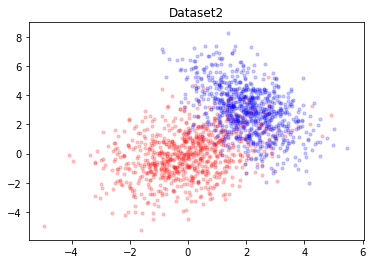

In [253]:
plt.scatter(df2_class0["x1"], df2_class0["x2"], c="r", alpha=0.2, s=10)
plt.scatter(df2_class1["x1"], df2_class1["x2"], c="b", alpha=0.2, s=10)
plt.gca().set(title='Dataset2')

In [462]:
#Implmenet PART B:
test1 = pd.read_csv("test1.csv")
test2 = pd.read_csv("test2.csv")

In [351]:
meanx1_0 = np.array([[np.mean(df1_class0["x1"])], [np.mean(df1_class0["x2"])]])
print(meanx1_0) #Mean vector class 0 of dataset1
print(cov_mtrx1_0) #cov matrix of class 0 dataset1

[[-1.04624698]
 [ 3.26924606]]
          x1        x2
x1  1.147041 -0.376974
x2 -0.376974  2.104315


In [345]:
meanx1_1 = np.array([[np.mean(df1_class1["x1"])], [np.mean(df1_class1["x2"])]])
print(meanx1_1) #Mean vector class 1 of dataset1
print(cov_mtrx1_1) #cov matrix of class 1 dataset1

[[1.95375302]
 [6.26924606]]
          x1        x2
x1  1.147041 -0.376974
x2 -0.376974  2.104315


In [346]:
meanx2_0 = np.array([[np.mean(df2_class0["x1"])], [np.mean(df2_class0["x2"])]])
print(meanx2_0) #Mean vector class 0 of dataset2
print(cov_mtrx2_0) #cov matrix of class 0 dataset2

[[ 0.00246486]
 [-0.01971604]]
          x1        x2
x1  1.922112  0.857977
x2  0.857977  2.839344


In [347]:
meanx2_1 = np.array([[np.mean(df2_class1["x1"])], [np.mean(df2_class1["x2"])]])
print(meanx2_1) #Mean vector class 1 of dataset2
print(cov_mtrx2_1) #cov matrix of class 1 dataset2

[[2.0536608 ]
 [2.97765078]]
          x1        x2
x1  0.997699 -0.818803
x2 -0.818803  2.949629


In [ ]:
#Since case 1 is suitable for the df1 I used its means and cov matrices

In [450]:
def g1_0(x1, x2): #For case 1 class 0
    x = np.array([[x1],[x2]])
    result = (x-meanx1_0).transpose()
    result = result.dot(np.linalg.inv(cov_mtrx1_0))
    result = result.dot(x-meanx1_0)
    result = result * 0.5
    return result[0][0]

In [451]:
def g1_1(x1, x2): #For case 1 class 1
    x = np.array([[x1],[x2]])
    result = (x-meanx1_1).transpose()
    result = result.dot(np.linalg.inv(cov_mtrx1_1))
    result = result.dot(x-meanx1_1)
    result = result * -0.5
    return result[0][0]

In [ ]:
#For the case 2 i could not understand because in the video cov matrices were same and it was proportional to I matrix.
#But this case proportional to the I matrix but they are not same.

In [ ]:
#Below g3 is the general case. I used df2 mean and cov matrices.

In [415]:
def g3_0(x1, x2):
    x = np.array([[x1],[x2]])
    result = (x-meanx2_0).transpose()
    result = result.dot(np.linalg.inv(cov_mtrx2_0))
    result = result.dot(x-meanx2_0)
    result = result + np.log(np.linalg.det(cov_mtrx2_0))
    result = result * -0.5
    return result[0][0]

In [537]:
def g3_1(x1, x2):
    x = np.array([[x1],[x2]])
    result = (x-meanx2_1).transpose()
    result = result.dot(np.linalg.inv(cov_mtrx2_1))
    result = result.dot(x-meanx2_1)
    result = result + np.log(np.linalg.det(cov_mtrx2_1))
    result = result * -0.5
    return result[0][0]

In [476]:
test1['est0'] = test1.apply(lambda x: g1_0(x.x1, x.x2), axis=1)
test1['est1'] = test1.apply(lambda x: g1_1(x.x1, x.x2), axis=1)

In [490]:
test1['est_value'] = (abs(test1.est0) > abs(test1.est1))
test1['est_value'] = test1['est_value'].astype(int)

In [498]:
test2['est0'] = test2.apply(lambda x: g3_0(x.x1, x.x2), axis=1)
test2['est1'] = test2.apply(lambda x: g3_1(x.x1, x.x2), axis=1)

In [499]:
test2['est_value'] = (abs(test2.est0) > abs(test2.est1))
test2['est_value'] = test2['est_value'].astype(int)

In [501]:
# I applied case 1 to the test1 and case 3 to the test2 datas

In [506]:
test1["success"] = test1.y == test1.est_value
test2["success"] = test2.y == test2.est_value

In [528]:
f = len(test1[test1.success == False].index)
total = len(test1.index)
error = (f/total)*100
error # Error of test1

2.0

In [529]:
f = len(test2[test2.success == False].index)
total = len(test2.index)
error = (f/total)*100
error # Error of test2

11.5

In [ ]:
#Implement PART C:

[Text(0.5, 1.0, 'Dataset2 Modified')]

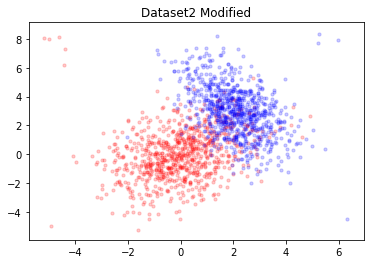

In [533]:
#Implement Part D:
df2m = pd.read_csv("train2_modified.csv")
df2m_class0 = df2m[df2m['y']==0]
df2m_class1 = df2m[df2m['y']==1]
plt.scatter(df2m_class0["x1"], df2m_class0["x2"], c="r", alpha=0.2, s=10)
plt.scatter(df2m_class1["x1"], df2m_class1["x2"], c="b", alpha=0.2, s=10)
plt.gca().set(title='Dataset2 Modified')

In [ ]:
# I noticed that there are outliers around. 

In [542]:
cov_mtrx2m_0 = df2m_class0.cov()
cov_mtrx2m_1 = df2m_class1.cov()
cov_mtrx2m_0 = cov_mtrx2m_0[["x1", "x2"]]
cov_mtrx2m_0 = cov_mtrx2m_0.loc[["x1", "x2"]]
cov_mtrx2m_1 = cov_mtrx2m_1[["x1", "x2"]]
cov_mtrx2m_1 = cov_mtrx2m_1.loc[["x1", "x2"]]
meanx2m_0 = np.array([[np.mean(df2m_class0["x1"])], [np.mean(df2m_class0["x2"])]])
meanx2m_1 = np.array([[np.mean(df2m_class1["x1"])], [np.mean(df2m_class1["x2"])]])


In [543]:
def g3m_0(x1, x2):
    x = np.array([[x1],[x2]])
    result = (x-meanx2m_0).transpose()
    result = result.dot(np.linalg.inv(cov_mtrx2m_0))
    result = result.dot(x-meanx2m_0)
    result = result + np.log(np.linalg.det(cov_mtrx2m_0))
    result = result * -0.5
    return result[0][0]
def g3m_1(x1, x2):
    x = np.array([[x1],[x2]])
    result = (x-meanx2m_1).transpose()
    result = result.dot(np.linalg.inv(cov_mtrx2m_1))
    result = result.dot(x-meanx2m_1)
    result = result + np.log(np.linalg.det(cov_mtrx2m_1))
    result = result * -0.5
    return result[0][0]

In [544]:
df2m['est0'] = df2m.apply(lambda x: g3m_0(x.x1, x.x2), axis=1)
df2m['est1'] = df2m.apply(lambda x: g3m_1(x.x1, x.x2), axis=1)
df2m['est_value'] = (abs(df2m.est0) > abs(df2m.est1))
df2m['est_value'] = df2m['est_value'].astype(int)
df2m["success"] = df2m.y == df2m.est_value


In [545]:
f = len(df2m[df2m.success == False].index)
total = len(df2m.index)
error = (f/total)*100
error # Error of Modified dataset2

10.124223602484472

In [547]:
# I got less error although I expected higher error because of the outliers. 
# Actually when I think again they are not outliers. They are easy to seperate. Yes they are far away to clusters but
# when you try to seperate they are easier to seperate. I think the model seperate them succesfuly so this is why less 
# error

In [177]:
#Additional space for your general comments about HW and Bayes Classifier